In [19]:
import pandas as pd
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sb
import matplotlib.pyplot as plt

In [20]:
manual_df = pd.read_excel("Working_Sample_Classification.xlsx")
gemini_df = pd.read_csv("Gemini_raw_output_v6.csv")
gpt_df = pd.read_csv("GPT-35-TURBO-Classification_v2.csv")

C:\Users\mm0450.MAVEN\AppData\Roaming\Python\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [21]:
manual_df.info()
gemini_df.info()
gpt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              502 non-null    int64  
 1   title           502 non-null    object 
 2   ingredients     502 non-null    object 
 3   Unnamed: 3      0 non-null      float64
 4   directions      502 non-null    object 
 5   link            502 non-null    object 
 6   source          502 non-null    object 
 7   NER             502 non-null    object 
 8   site            502 non-null    object 
 9   classification  502 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                500 non-null    int64 
 1   title             500 non-null    object
 2 

In [22]:
del manual_df['Unnamed: 3']

In [23]:
# Join manual with Gemini
gemini_join = manual_df.join(gemini_df['Gemini_OP'], on='id',how='inner')

In [24]:
# Calculation of Metrics
actual_values = gemini_join['classification']
annotated_values = gemini_join['Gemini_OP']

precision = precision_score(actual_values,annotated_values,average='weighted')
accuracy = accuracy_score(actual_values,annotated_values)
recall = recall_score(actual_values,annotated_values,average='weighted')
f1 = f1_score(actual_values,annotated_values,average='weighted')
gemini_cm = confusion_matrix(actual_values,annotated_values)

In [25]:
print("Precision: ",precision)
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("F1: ",f1)

Precision:  0.7063138176618963
Accuracy:  0.724
Recall:  0.724
F1:  0.7090221691786583


In [26]:
# Join with GPT
gpt_join = manual_df.join(gpt_df['GPT_OP'],on="id",how='inner')

In [27]:
gpt_join.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              501 non-null    int64 
 1   title           501 non-null    object
 2   ingredients     501 non-null    object
 3   directions      501 non-null    object
 4   link            501 non-null    object
 5   source          501 non-null    object
 6   NER             501 non-null    object
 7   site            501 non-null    object
 8   classification  501 non-null    object
 9   GPT_OP          501 non-null    object
dtypes: int64(1), object(9)
memory usage: 43.1+ KB


In [28]:
# Calculation of Metrics
actual_values = gpt_join['classification']
annotated_values = gpt_join['GPT_OP']

precision = precision_score(actual_values,annotated_values,average='weighted')
accuracy = accuracy_score(actual_values,annotated_values)
recall = recall_score(actual_values,annotated_values,average='weighted')
f1 = f1_score(actual_values,annotated_values,average='weighted')
gpt_cm = confusion_matrix(actual_values,annotated_values)

In [29]:
print("Precision: ",precision)
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("F1: ",f1)

Precision:  0.6256878385411866
Accuracy:  0.6207584830339321
Recall:  0.6207584830339321
F1:  0.6157384430853079


In [30]:
def display_confusion_matrix(cm):
    # Creating a heatmap using Seaborn
    plt.figure(figsize=(6, 4))
    sb.heatmap(cm, annot=True, cmap='Blues', fmt='d', 
                xticklabels=['Predicted Veg', 'Predicted Vegan', 'Predicted NonVeg'],
                yticklabels=['Actual Veg', 'Actual Vegan', 'Actual NonVeg'])

    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

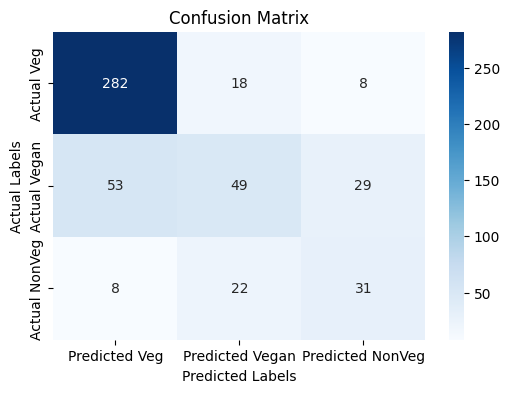

In [31]:
# Gemini Confusion Matrix
display_confusion_matrix(gemini_cm)

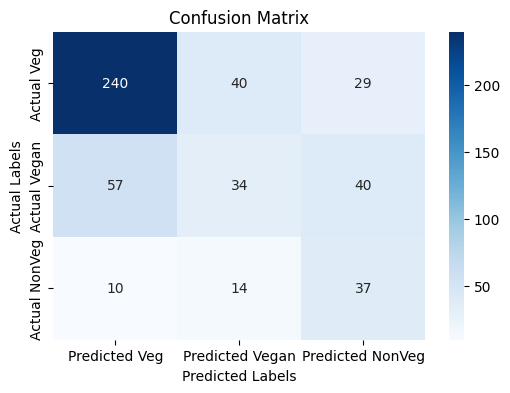

In [32]:
#GPT Confusion Matrix
display_confusion_matrix(gpt_cm)